In [2]:
# set path

rootdir = '/Users/rj/'
import os,sys
# append the path where your scripts are
sys.path.append(rootdir+"soft/python/") 
# import your own packages
from universal import *
plot_conf()

workdir = rootdir + 'Fellow-CERN/SAD/ATF2/ultralow/Energy/'
os.chdir(workdir)
import random as rand

from matplotlib.ticker import AutoMinorLocator

In [83]:
# 20bx0.15by
dat0 = loadtxt('data/SIGY_dE_2019Mar15_w_SextErr_cal.dat')
# dat0 = loadtxt('data/SIGY_dE_IP_20bx0p15by_w_SextErr_cal.dat')
sigy_err_ul = []
for i in range(len(dat0)):
    sigy_err_ul.append([mean(dat0[i,:]), std(dat0[i,:])])
sigy_err_ul = transpose(sigy_err_ul) #

# 20bx0.15by
# ßnot yet updated
# dat0 = loadtxt('data/SIGY_dE_IP_20bx0p15by_w_SextErr_track.dat')
# sigy_err_ultr = []
# for i in range(len(dat0)):
#    sigy_err_ultr.append([mean(dat0[i,:]), std(dat0[i,:])])
# sigy_err_ultr = transpose(sigy_err_ultr) #

In [84]:
# Measurements Mar 15, 2019
# amp, beamsize, beamsize error, modulation, modulation error
dat0=loadtxt('data/df_fringe_190315_132652.dat', comments='!', delimiter=',', usecols=[2, 3, 4, 5, 6])
df, sigy, errsigy, modu, errmodu = transpose(dat0)

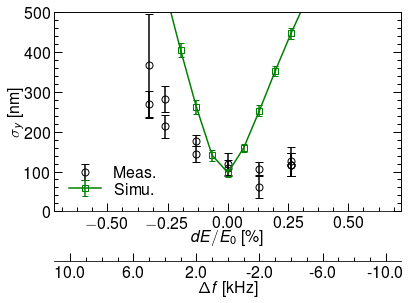

In [88]:
alphac = 2.14e-3;
freq0 = 714e6; # MHz
freq2p= -1/freq0/alphac;

dE_ft = np.arange(-10e3, 10.1e3, 1e3)*freq2p
# nseed = 50

# Mar15, 2019
ax1 = plt.subplot(1,1,1)
plt.errorbar(df*freq2p*1e5, sigy, yerr=errsigy, fmt='ko', mfc='none', ms=7, capsize=4, label=r'Meas.')
ax1.errorbar(-dE_ft*1e2, sigy_err_ul[0]*1e9, yerr=sigy_err_ul[1]*1e9/sqrt(nseed), fmt = 'gs-', capsize=3, mfc = 'None', label=r'Simu.')
ax1.set_xlabel(r'$dE/E_0$ [\%]')
ax1.set_ylabel(r'$\sigma_y$ [nm]')
# ax1.set_xlim(-0.5, 0.5)
ax1.set_ylim(0, 500)
# ax1.set_yscale('log')
ax1.legend(loc='best', frameon=False)

ax2 = ax1.twiny()
xlab2 = np.arange(-10, 10.1, 4)
xlab2_pos = xlab2*1e3*freq2p*1e2
ax2.set_xticks(-xlab2_pos)
ax2.set_xticklabels(-xlab2)

ax2.xaxis.set_ticks_position('bottom') # set the position of the second x-axis to bottom
ax2.xaxis.set_label_position('bottom') # set the position of the second x-axis to bottom
ax2.spines['bottom'].set_position(('outward', 50))
ax2.set_xlabel(r'$\Delta{f}$ [kHz]')
ax2.set_xlim(ax1.get_xlim())

plt.tight_layout()
plt.savefig("figure/SIGY_dE_w_err_demo.pdf")
plt.show()